In [1]:
# Standard imports
import pathlib

# Third party imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors

# Internal imports

In [2]:
# set plot style
%matplotlib widget
plt.style.use('plot_style.txt')

# output path for figures 
output_path = pathlib.Path("/home/jonas/shared/Work/SSeep2026/Figures")

##### van Genuchten-Mualem
Compare different values of the sigmoid parameter a_nsh, used to interpolated between the negl-soft and soft-hard solutions. Errors have been assesed over the infiltrability plane a_nsh values increasing from 0.7 to 1.4.

In [3]:
# load data
df_vGM = pd.read_csv('exp3_vGM/rates_0.9.csv', index_col=0)

df_vGM['cond_ratio'] = df_vGM['aq_cond'] / df_vGM['cl_cond']
cond_ratio = df_vGM['cond_ratio'].unique()
b = df_vGM['b'].unique()

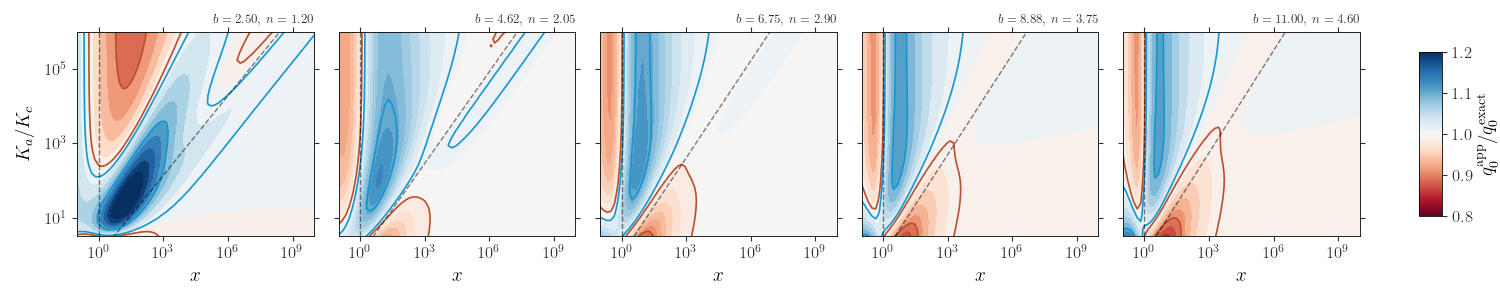

In [4]:
fig, axs = plt.subplots(1, len(b), figsize=(3 * len(b), 3))

c099 = "#b84e2e"
c101 = "#1696d1"

cmap = cm.RdBu
norm = colors.Normalize(vmin=0.8, vmax=1.2)

for i, v in enumerate(b):
    idx = df_vGM['b'] == v
    x = np.log10(df_vGM.loc[idx, 'x'].unique())
    y = np.log10(df_vGM.loc[idx, 'cond_ratio'].unique())
    z = df_vGM.loc[idx, 'q0_ap'] / df_vGM.loc[idx, 'q0_ex']
    z = z.to_numpy().reshape(len(x), len(y)).T
    cf = axs[i].contourf(x, y, z, levels=15, cmap=cmap, norm=norm)
    cl = axs[i].contour(x, y, z, levels=[0.9, 0.99, 1.01, 1.1], colors=[c099, c099, c101, c101],
                        linestyles='-')

    axs[i].axvline(0, ls='--', c='k', lw=1, alpha=0.5)
    x = np.linspace(0, 10)
    y = v / (1 + v) * x
    axs[i].plot(x, y, ls='--', c='k', lw=1, alpha=0.5)


for i1 in range(len(b)):
    axs[i1].spines["top"].set_visible(True)
    axs[i1].spines["right"].set_visible(True)
    axs[i1].tick_params(top=True, right=True)
    axs[i1].set(xscale='linear', yscale='linear')
    axs[i1].minorticks_off()
    axs[i1].set_xlabel('$x$', labelpad=5)
    axs[i1].set_xlim(xmin=-1, xmax=10)
    axs[i1].set_xticks([0, 3, 6, 9],
                       labels=['$10^0$', '$10^3$', '$10^6$', '$10^9$'])
    axs[i1].set_ylim(ymin=0.5, ymax=6)
    axs[i1].set_yticks([1, 3, 5], labels=[])
    axs[i1].set_title(f'$b = {b[i1]:.2f}$, $n = {(2*b[i1]+1)/5:.2f}$', fontsize=9)
axs[0].set_ylabel('$K_a / K_c$', labelpad=8)
axs[0].set_yticklabels(['$10^1$', '$10^3$', '$10^5$'])

# colorbar
cax = axs[-1].inset_axes([1.25, 0.1, 0.1, 0.8])
cb = fig.colorbar(cm.ScalarMappable(cmap=cmap, norm=norm), cax=cax,
             orientation='vertical', label='$q_0^\\mathrm{app} / q_0^\\mathrm{exact}$')

plt.tight_layout()
#plt.savefig(output_path / 'q0_map_vGM/09.pdf')

Comparing the above error maps, a visual "best" interpolation is set to a_nsh(b) = 1.02 + 0.25 * tanh(b-7).

#### van Genuchten - Mualem

In [5]:
# load data
df_vGM = pd.read_csv('exp3_vGM/rates.csv', index_col=0)

df_vGM['cond_ratio'] = df_vGM['aq_cond'] / df_vGM['cl_cond']
cond_ratio = df_vGM['cond_ratio'].unique()
b = df_vGM['b'].unique()
b = [b[i] for i in [2, 5, 8, 13]]

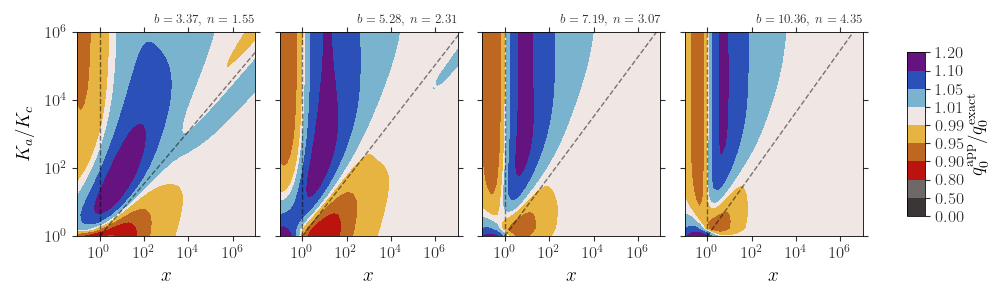

In [ ]:
fig, axs = plt.subplots(1, len(b), figsize=(2.5 * len(b), 3))

bounds = [0., 0.5, 0.8, 0.9, 0.95, 0.99, 1.01, 1.05, 1.1, 1.2]
color_list = ["#3A3636", "#6E6868", "#bb140e", "#be6720", "#e7b341",
              "#f0e7e4",  "#79b3ce","#2B51B8", "#65137e"]
cmap = colors.LinearSegmentedColormap.from_list('mymap', color_list, 9)
norm = colors.BoundaryNorm(bounds, ncolors=9)

for i, v in enumerate(b):
    idx = df_vGM['b'] == v
    x = np.log10(df_vGM.loc[idx, 'x'].unique())
    y = np.log10(df_vGM.loc[idx, 'cond_ratio'].unique())
    z = df_vGM.loc[idx, 'q0_ap'] / df_vGM.loc[idx, 'q0_ex']
    z = z.to_numpy().reshape(len(x), len(y)).T
    cf = axs[i].contourf(x, y, z, levels=bounds, colors=color_list)

    axs[i].axvline(0, ls='--', c='k', lw=1, alpha=0.5)
    x = np.linspace(0, 10)
    y = v / (1 + v) * x
    axs[i].plot(x, y, ls='--', c='k', lw=1, alpha=0.5)


for i1 in range(len(b)):
    axs[i1].spines["top"].set_visible(True)
    axs[i1].spines["right"].set_visible(True)
    axs[i1].tick_params(top=True, right=True)
    axs[i1].set(xscale='linear', yscale='linear')
    axs[i1].minorticks_off()
    axs[i1].set_xlabel('$x$', labelpad=5)
    axs[i1].set_xlim(xmin=-1, xmax=7)
    axs[i1].set_xticks([0, 2, 4, 6],
                       labels=['$10^0$', '$10^2$', '$10^4$', '$10^6$'])
    axs[i1].set_ylim(ymin=0, ymax=6)
    axs[i1].set_yticks([0, 2, 4, 6], labels=[])
    axs[i1].set_title(f'$b = {b[i1]:.2f}$, $n = {(2*b[i1]+1)/5:.2f}$',
                      fontsize=9)
axs[0].set_ylabel('$K_a / K_c$', labelpad=8)
axs[0].set_yticklabels(['$10^0$', '$10^2$', '$10^4$', '$10^6$'])

# colorbar
cax = axs[-1].inset_axes([1.25, 0.1, 0.1, 0.8])
cb = plt.colorbar(cm.ScalarMappable(cmap=cmap, norm=norm), cax=cax,
                  orientation='vertical',
                  label='$q_0^\\mathrm{app} / q_0^\\mathrm{exact}$'
                  )


plt.tight_layout()
#plt.savefig(output_path / 'q0_map_vGM.pdf')

#### Brooks - Corey - Burdine

In [7]:
# load data
df_BCB = pd.read_csv('exp3_BCB/rates.csv', index_col=0)
df_BCB['cond_ratio'] = df_BCB['aq_cond'] / df_BCB['cl_cond']
cond_ratio = df_BCB['cond_ratio'].unique()
b = df_BCB['b'].unique()
b = [b[i] for i in [2, 5, 8, 13]]

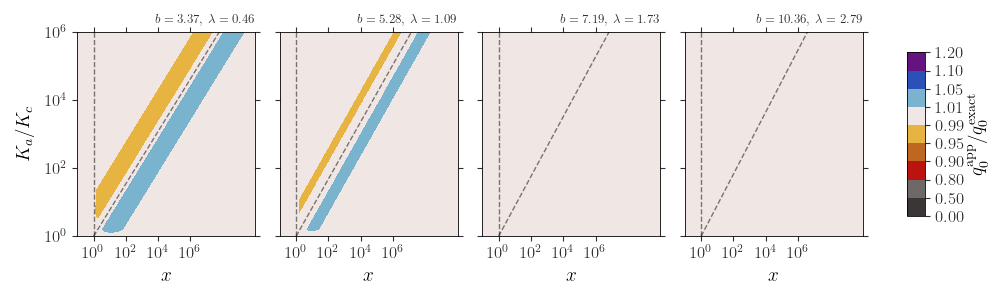

In [ ]:
fig, axs = plt.subplots(1, len(b), figsize=(2.5 * len(b), 3))

bounds = [0., 0.5, 0.8, 0.9, 0.95, 0.99, 1.01, 1.05, 1.1, 1.2]
color_list = ["#3A3636", "#6E6868", "#bb140e", "#be6720", "#e7b341",
              "#f0e7e4",  "#79b3ce","#2B51B8", "#65137e"]
cmap = colors.LinearSegmentedColormap.from_list('mymap', color_list, 9)
norm = colors.BoundaryNorm(bounds, ncolors=9)

for i, v in enumerate(b):
    idx = df_BCB['b'] == v
    x = np.log10(df_BCB.loc[idx, 'x'].unique())
    y = np.log10(df_BCB.loc[idx, 'cond_ratio'].unique())
    z = df_BCB.loc[idx, 'q0_ap'] / df_BCB.loc[idx, 'q0_ex']
    z = z.to_numpy().reshape(len(x), len(y)).T
    cf = axs[i].contourf(x, y, z, levels=bounds, colors=color_list)

    axs[i].axvline(0, ls='--', c='k', lw=1, alpha=0.5)
    x = np.linspace(0, 10)
    y = v / (1 + v) * x
    axs[i].plot(x, y, ls='--', c='k', lw=1, alpha=0.5)

for i1 in range(len(b)):
    axs[i1].spines["top"].set_visible(True)
    axs[i1].spines["right"].set_visible(True)
    axs[i1].tick_params(top=True, right=True)
    axs[i1].set(xscale='linear', yscale='linear')
    axs[i1].minorticks_off()
    axs[i1].set_xlabel('$x$', labelpad=5)
    axs[i1].set_xlim(xmin=-1, xmax=10)
    axs[i1].set_xticks([0, 2, 4, 6],
                       labels=['$10^0$', '$10^2$', '$10^4$', '$10^6$'])
    axs[i1].set_ylim(ymin=0, ymax=6)
    axs[i1].set_yticks([0, 2, 4, 6], labels=[])
    axs[i1].set_title(f'$b = {b[i1]:.2f}$, $\\lambda = {(b[i1]-2)/3:.2f}$',
                      fontsize=9)
axs[0].set_ylabel('$K_a / K_c$', labelpad=8)
axs[0].set_yticklabels(['$10^0$', '$10^2$', '$10^4$', '$10^6$'])

# colorbar
cax = axs[-1].inset_axes([1.25, 0.1, 0.1, 0.8])
cb = plt.colorbar(cm.ScalarMappable(cmap=cmap, norm=norm), cax=cax,
                  orientation='vertical',
                  label='$q_0^\\mathrm{app} / q_0^\\mathrm{exact}$'
                  )

plt.tight_layout()
#plt.savefig(output_path / 'q0_map_BCB.pdf')

#### MODFLOW

In [8]:
# load data
df_MF = pd.read_csv('exp3_BCB/rates.csv', index_col=0)
df_MF['cond_ratio'] = df_MF['aq_cond'] / df_MF['cl_cond']
cond_ratio = df_MF['cond_ratio'].unique()
b = df_MF['b'].unique()
b = [b[i] for i in [2, 5, 8, 13]]

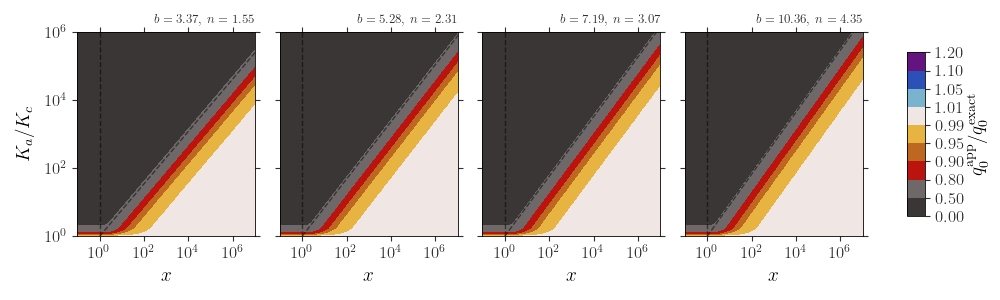

In [ ]:
fig, axs = plt.subplots(1, len(b), figsize=(2.5 * len(b), 3))

bounds = [0., 0.5, 0.8, 0.9, 0.95, 0.99, 1.01, 1.05, 1.1, 1.2]
color_list = ["#3A3636", "#6E6868", "#bb140e", "#be6720", "#e7b341",
              "#f0e7e4",  "#79b3ce","#2B51B8", "#65137e"]
cmap = colors.LinearSegmentedColormap.from_list('mymap', color_list, 9)
norm = colors.BoundaryNorm(bounds, ncolors=9)

for i, v in enumerate(b):
    idx = df_MF['b'] == v
    x = np.log10(df_MF.loc[idx, 'x'].unique())
    y = np.log10(df_MF.loc[idx, 'cond_ratio'].unique())
    z = df_MF.loc[idx, 'cl_cond'] / df_MF.loc[idx, 'q0_ex']
    z = z.to_numpy().reshape(len(x), len(y)).T
    cf = axs[i].contourf(x, y, z, levels=bounds, colors=color_list)

    axs[i].axvline(0, ls='--', c='k', lw=1, alpha=0.5)
    x = np.linspace(0, 10)
    y = v / (1 + v) * x
    axs[i].plot(x, y, ls='--', c='k', lw=1, alpha=0.5)


for i1 in range(len(b)):
    axs[i1].spines["top"].set_visible(True)
    axs[i1].spines["right"].set_visible(True)
    axs[i1].tick_params(top=True, right=True)
    axs[i1].set(xscale='linear', yscale='linear')
    axs[i1].minorticks_off()
    axs[i1].set_xlabel('$x$', labelpad=5)
    axs[i1].set_xlim(xmin=-1, xmax=7)
    axs[i1].set_xticks([0, 2, 4, 6],
                       labels=['$10^0$', '$10^2$', '$10^4$', '$10^6$'])
    axs[i1].set_ylim(ymin=0, ymax=6)
    axs[i1].set_yticks([0, 2, 4, 6], labels=[])
    axs[i1].set_title(f'$b = {b[i1]:.2f}$, $n = {(2*b[i1]+1)/5:.2f}$',
                      fontsize=9)
axs[0].set_ylabel('$K_a / K_c$', labelpad=8)
axs[0].set_yticklabels(['$10^0$', '$10^2$', '$10^4$', '$10^6$'])

# colorbar
cax = axs[-1].inset_axes([1.25, 0.1, 0.1, 0.8])
cb = plt.colorbar(cm.ScalarMappable(cmap=cmap, norm=norm), cax=cax,
                  orientation='vertical',
                  label='$q_0^\\mathrm{app} / q_0^\\mathrm{exact}$'
                  )


plt.tight_layout()
#plt.savefig(output_path / 'q0_map_MF.pdf')